In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_final.csv')
sample = pd.read_csv('sample_submission.csv')

       Time        F1        F2        F3        F4        F5        F6  \
0   51803.0  1.133835 -0.667209  0.258635  0.470179 -0.935900 -0.302215   
1   73472.0 -1.130695  0.812982  0.892485 -0.552766  1.834398  4.246646   
2  155577.0  2.045388  0.003926 -1.198560  1.596251  0.500370  0.213221   
3  154621.0 -0.689977  0.906410 -1.304054 -2.154322  4.003081  2.890035   
4  134928.0  0.873930 -2.379076 -1.465831  0.527825 -0.778962  0.288092   

         F7        F8        F9  ...       F22       F23       F24       F25  \
0 -0.454738  0.065285 -0.967113  ... -0.599348 -0.104886 -0.096113  0.408226   
1 -0.567269  1.318548  0.117874  ... -0.176423 -0.334663  0.998892  0.452230   
2 -0.096227 -0.075300 -0.828483  ...  0.649778 -0.055347 -0.876479 -0.139110   
3  1.535151  0.439834 -1.131134  ... -0.129991 -0.550813  0.651976  1.130701   
4  0.189899 -0.143854  0.998534  ...  0.157962 -0.415068  0.123369 -0.451026   

        F26       F27       F28  PowerUsage  Class      ID  
0 -0.32

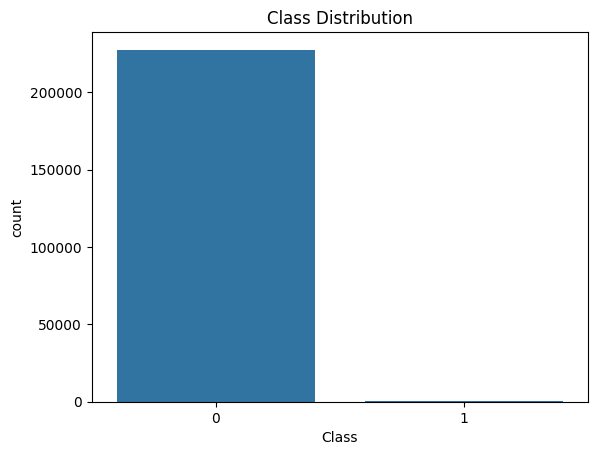

In [3]:
print(train.head())
print(train.info())
print(train.describe())
print(train.isnull().sum())

sns.countplot(x='Class', data=train)
plt.title('Class Distribution')
plt.show()

In [4]:
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(train.median(numeric_only=True), inplace=True)
train.drop_duplicates(inplace=True)

X = train.drop(columns=['Class','ID'])
y = train['Class']
test_ids = test['ID']
test = test.drop(columns=['ID'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)


In [37]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train_resampled)

val_preds = model.predict(X_val_scaled)
print("F1 Score:", f1_score(y_val, val_preds))
print("\nClassification Report:")
print(classification_report(y_val, val_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_preds))

F1 Score: 0.8070175438596491

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45483
           1       0.82      0.79      0.81        87

    accuracy                           1.00     45570
   macro avg       0.91      0.90      0.90     45570
weighted avg       1.00      1.00      1.00     45570


Confusion Matrix:
[[45468    15]
 [   18    69]]


In [38]:
test_preds = model.predict(test_scaled)

submission = pd.DataFrame({
    'ID': test_ids,
    'prediction': test_preds
})

submission.to_csv('predictions2B.csv', index=False)

In [39]:
joblib.dump(model, 'final_model.joblib')
joblib.dump(scaler, 'final_scaler.joblib')

['final_scaler.joblib']